In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import  os
import cv2
import keras
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from matplotlib import pyplot
from keras.optimizers import Adam
from keras.models import model_from_json
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras import backend as K


In [ ]:
categories = os.listdir('/content/gdrive/My Drive/food20dataset/test_set')

img_size = 256
def get_data(data_dir):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img))
                resized_arr = cv2.resize(img_arr,(img_size,img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)        
    
    
train = get_data('/content/gdrive/My Drive/food20dataset/train_set')  
val = get_data('/content/gdrive/My Drive/food20dataset/test_set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
    
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size,img_size,1)
y_train = np.array(y_train)

x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

In [ ]:
model = Sequential()
model.add(Conv2D(128,3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(14,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

In [ ]:
opt = Adam(lr =0.00012)
model.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, epochs = 13, validation_data=(x_val,y_val))

Epoch 1/13
31/31 [==============================] - 215s 7s/step - loss: 2.6592 - accuracy: 0.0804 - val_loss: 2.5186 - val_accuracy: 0.1595
Epoch 2/13
31/31 [==============================] - 218s 7s/step - loss: 2.4444 - accuracy: 0.1799 - val_loss: 2.1021 - val_accuracy: 0.3048
Epoch 3/13
31/31 [==============================] - 218s 7s/step - loss: 2.0263 - accuracy: 0.3613 - val_loss: 1.8009 - val_accuracy: 0.4548
Epoch 4/13
31/31 [==============================] - 214s 7s/step - loss: 1.7352 - accuracy: 0.4753 - val_loss: 1.6026 - val_accuracy: 0.4952
Epoch 5/13
31/31 [==============================] - 223s 7s/step - loss: 1.3989 - accuracy: 0.5858 - val_loss: 1.5031 - val_accuracy: 0.4976
Epoch 6/13
31/31 [==============================] - 217s 7s/step - loss: 1.1446 - accuracy: 0.6734 - val_loss: 1.2923 - val_accuracy: 0.5857
Epoch 7/13
31/31 [==============================] - 217s 7s/step - loss: 0.8441 - accuracy: 0.7673 - val_loss: 1.2097 - val_accuracy: 0.6595
Epoch 8/13
31

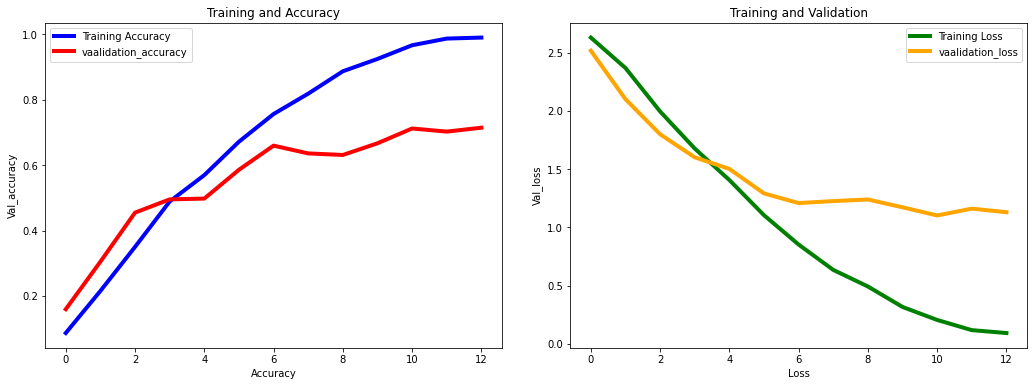

In [ ]:
epochs_range = range(13)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
ax1.plot(epochs_range,acc,label='Training Accuracy',c='blue',linewidth = 4)
ax1.plot(epochs_range,val_acc, label='vaalidation_accuracy',c='red',linewidth=4)
ax1.legend()
ax1.set_title('Training and Accuracy')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_ylabel('Val_accuracy', fontsize=10)


ax2.plot(epochs_range,loss,label='Training Loss',c='green',linewidth = 4)
ax2.plot(epochs_range,val_loss, label='vaalidation_loss',c='orange',linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation')
ax2.set_xlabel('Loss', fontsize=10)
ax2.set_ylabel('Val_loss', fontsize=10)

fig.tight_layout(pad=3.0)
plt.show()


In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val,predictions,target_names=categories))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                  precision    recall  f1-score   support

           poori       0.87      0.67      0.75        30
tandoori chicken       0.79      0.87      0.83        30
      kathi roll       0.70      0.53      0.60        30
      ven pongal       0.61      0.83      0.70        30
            upma       0.74      0.57      0.64        30
         noodles       0.87      0.67      0.75        30
       paniyaram       0.69      0.83      0.76        30
        vada pav       0.77      0.67      0.71        30
          dhokla       0.84      0.87      0.85        30
     gulab jamun       0.62      0.50      0.56        30
           chaat       0.76      0.87      0.81        30
            idly       0.72      0.70      0.71        30
           halwa       0.49      0.70      0.58        30
        chappati       0.71      0.73      0.72        30

        accuracy                           0.71       420
       macro avg       0.73      0.71      0.71       420
    weighted

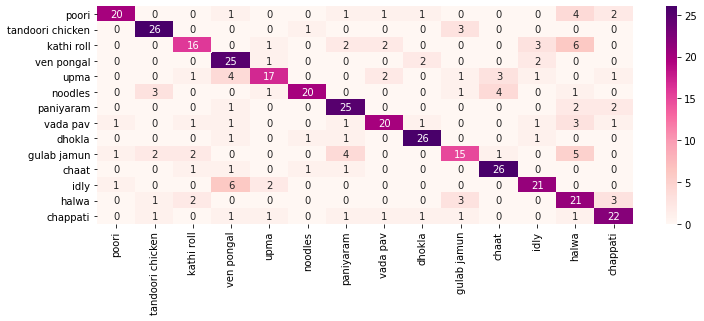

In [ ]:
cm1 = confusion_matrix(y_val,predictions)
df_cm  = pd.DataFrame(cm1,index=[i for i in categories],columns = [i for i in categories])
plt.figure(figsize=(12,4))
import seaborn as ns
ns.heatmap(df_cm,annot=True,cmap='RdPu')

In [ ]:
model.save('/content/gdrive/My Drive/food20dataset/my_modelcv14.h5')
model_json = model.to_json()
with open("model14.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('/content/gdrive/My Drive/food20dataset/my_modeljsn14.h5')

In [ ]:
model.save('/content/gdrive/My Drive/food20dataset/my_modelcv14.pb')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/food20dataset/my_modelcv14.pb/assets


In [ ]:
json_file = open('model14.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('/content/gdrive/My Drive/food20dataset/my_modeljsn14.h5')
img = cv2.imread('/content/gdrive/My Drive/food20dataset/pred/dhokla.jpg')
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])

classes = np.argmax(loaded_model.predict(img),axis=-1)
print(categories)
print(classes)

names = [categories[i] for i in classes]

print(names)

['poori', 'tandoori chicken', 'kathi roll', 'ven pongal', 'upma', 'noodles', 'paniyaram', 'vada pav', 'dhokla', 'gulab jamun', 'chaat', 'idly', 'halwa', 'chappati']
[8]
['dhokla']
